<a href="https://colab.research.google.com/github/goglom/data_processing_methods_in_scientific_research/blob/main/problem_1/problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
# Import block
import numpy as np
import matplotlib.pyplot as plt

In [69]:
def dft(x: np.array) -> np.array:
  N = x.shape[0]
  n = np.arange(N)
  result = np.zeros(N, dtype=np.complex)
  exp = lambda k: np.exp(-2j*np.pi * k * n / N)
  for k in range(N):
    result[k] =  np.sum(x * exp(k))

  return result


def idft(x: np.array) -> np.array:
  N = x.shape[0]
  n = np.arange(N)
  result = np.zeros(N, dtype=np.complex)
  exp = lambda k: np.exp(2j*np.pi * k * n / N)
  for k in range(N):
    result[k] =  np.sum(x * exp(k)) / N

  return result

In [70]:
def compare_with_fft(x: np.array, t: np.array):
  dft_x = dft(x)
  fft_x = np.fft.fft(x)
  assert np.allclose(dft_x, fft_x)
  assert np.allclose(idft(dft_x), np.fft.ifft(fft_x))

In [71]:
def paint_plot(x: np.array, t: np.array):
  dft_x = dft(x)
  fft_x = np.fft.fft(x)

  plt.figure(1)
  plt.title("Real part")
  plt.plot(t, np.real(dft_x), label="dft")
  plt.plot(t, np.real(fft_x), "r--", label="fft")

  plt.figure(2)
  plt.title("Imaginary part")
  plt.plot(t, np.imag(dft_x), label="dft")
  plt.plot(t, np.imag(fft_x), "r--", label="fft")

  plt.figure(3)
  plt.title("Absolute value")
  plt.plot(t, np.abs(dft_x), label="dft")
  plt.plot(t, np.abs(fft_x), "r--", label="fft")

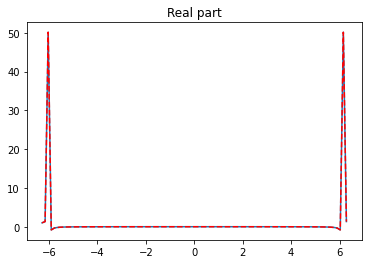

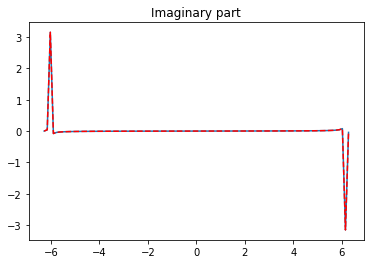

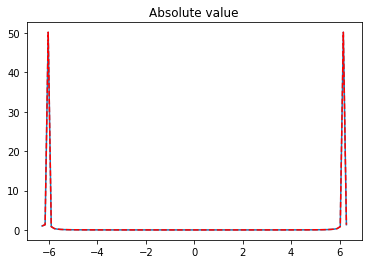

In [72]:
# Гармоническая функция
t = np.linspace(-2*np.pi, 2*np.pi, 100)
x = np.cos(t)
compare_with_fft(x, t)
paint_plot(x, t)

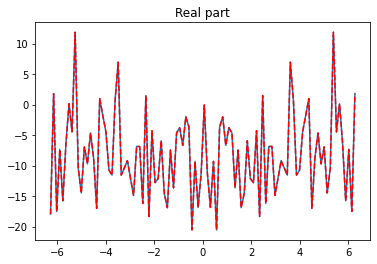

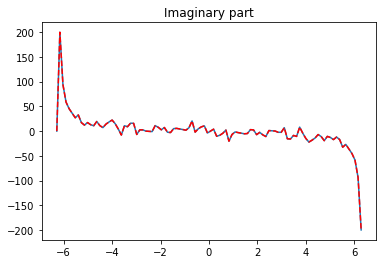

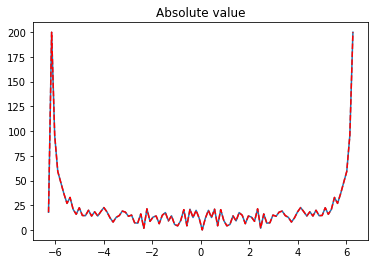

In [73]:
# Нормальный шум
t = np.linspace(-2*np.pi, 2*np.pi, 100)
x = np.random.normal(t)
compare_with_fft(x, t)
paint_plot(x, t)

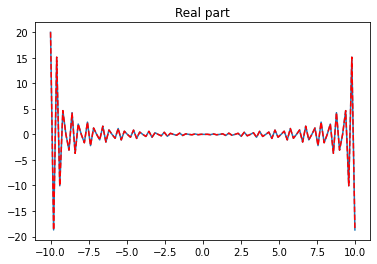

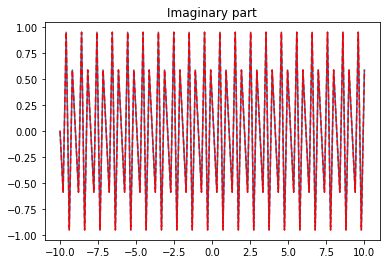

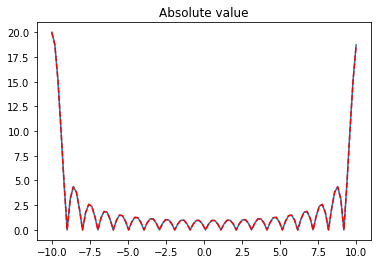

In [76]:
# Прямоугольный испульс
class Rect:
  def __init__(self, l_bound, r_bound):
    self.lb = l_bound
    self.rb = r_bound

  
  def __call__(self, x: np.array) -> float:
    result = np.zeros_like(x)
    for i in range(x.shape[0]):
      if x[i] > self.lb and x[i] < self.rb:
        result[i] = 1.0

    return result


rect2 = Rect(-2, 2)
t = np.linspace(-10, 10, 100)
x = rect2(t)
compare_with_fft(x ,t)
paint_plot(x, t)

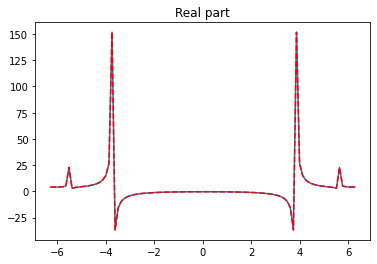

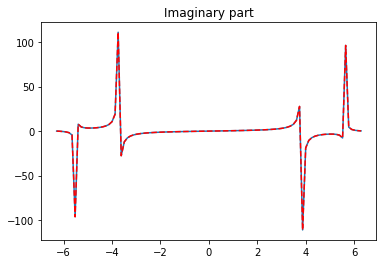

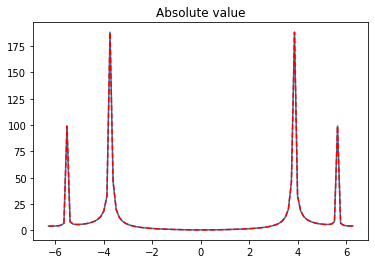

In [80]:
# Две гармонические функции с разными частотами и амплитудами
t = np.linspace(-2*np.pi, 2*np.pi, 100)
x = 2 * np.sin(t * 3) + 4 * np.cos(t * 10)
compare_with_fft(x ,t)
paint_plot(x, t)